In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [38]:
image = cv2.imread(r"C:\Users\markd\Documents\GitHub\ArticusMaximus\python_edge_detection\sample_images\amogus.png")
image = cv2.resize(image, (200, 200), interpolation=cv2.INTER_AREA)
cv2.imshow("image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [39]:
# Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("gray", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
# Threshold
ret, thresh = cv2.threshold(gray, 100, 225, cv2.THRESH_BINARY)
cv2.imshow("threshold", thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
# Blur 
blur = cv2.GaussianBlur(gray, (5,5), sigmaX=0, sigmaY=0)
cv2.imshow("blur", blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [42]:
# Canny
canny = cv2.Canny(gray, 30, 200)
cv2.imshow("Canny", canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [43]:
# Canny w blur
canny_blur = cv2.Canny(blur, 30, 200)
cv2.imshow("Canny w blur", canny_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
# Contour detection
contours, hierarchy = cv2.findContours(canny_blur, 
    cv2.RETR_TREE , cv2.CHAIN_APPROX_NONE)

1


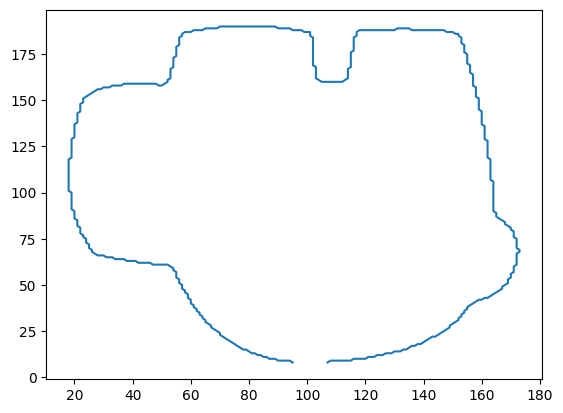

11


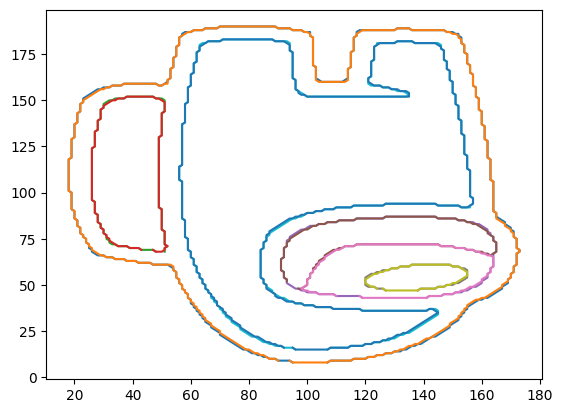

In [47]:
# All contours
# Contour detection
contours, hierarchy = cv2.findContours(canny_blur, 
    cv2.RETR_EXTERNAL  , cv2.CHAIN_APPROX_SIMPLE)

num_contours = len(contours)
print(num_contours)
for i in range(num_contours):
    contour_img = contours[i]
    if contour_img.shape[0] != 1:
        contour_img = np.squeeze(contour_img)
        # contour_img = cv2.flip(contour_img,0)
        plt.plot(contour_img[:,0], contour_img[:,1], label=f'{i}')
plt.show()


contours, hierarchy = cv2.findContours(canny_blur, 
    cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)

num_contours = len(contours)
print(num_contours)
for i in range(num_contours):
    contour_img = cv2.flip(contours[i], 0)
    if contour_img.shape[0] != 1:
        contour_img = np.squeeze(contour_img)
        plt.plot(contour_img[:,0], contour_img[:,1], label=f'{i}')
plt.show()

# Write contours to file
f = open("contour_output.txt", "w")
k = 0
for contour in contours:
    f.write(f'---- CONTOUR {k} ----\n')
    k += 1
    for i in range(contour.shape[0]):
        f.write(str(contour[i][0,0]))
        f.write(" ")
        f.write(str(contour[i][0,1]))
        f.write(" \n")

In [61]:
a_single_contour = contours[0]
a_single_value = a_single_contour[1]
a_single_pair = a_single_value[0]
a_single_pair

array([94,  9], dtype=int32)

In [13]:
contours, hierarchy = cv2.findContours(canny_blur, 
    cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
cv2.imshow('Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()